In [1]:
#lets import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading dataset from csv to pandas dataframe
heart = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\DS\heart2.csv")

In [3]:
#print first 5 rows
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
295,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
297,58,1,0,150,270,0,0,111,1,0.8,2,0,3,0
298,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
299,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1


In [5]:
#print the total rows and columns in dataset
heart.shape

(300, 14)

In [6]:
#any missing value
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    int64  
 1   sex       300 non-null    int64  
 2   cp        300 non-null    int64  
 3   trestbps  300 non-null    int64  
 4   chol      300 non-null    int64  
 5   fbs       300 non-null    int64  
 6   restecg   300 non-null    int64  
 7   thalach   300 non-null    int64  
 8   exang     300 non-null    int64  
 9   oldpeak   300 non-null    float64
 10  slope     300 non-null    int64  
 11  ca        300 non-null    int64  
 12  thal      300 non-null    int64  
 13  target    300 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.9 KB


## Splitting feature and columns

In [8]:
X = heart.drop(columns='target',axis=1)
Y = heart['target']

In [9]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
295   67    1   0       100   299    0        0      125      1      0.9   
296   67    1   0       120   237    0        1       71      0      1.0   
297   58    1   0       150   270    0        0      111      1      0.8   
298   35    1   1       122   192    0        1      174      0      0.0   
299   52    1   1       120   325    0        1      172      0      0.2   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

In [10]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    1
299    1
Name: target, Length: 300, dtype: int64


# Model Evaluation

## Evaluation by default parameters

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [26]:
log_reg = LogisticRegression(max_iter=100)

In [27]:
log_reg.fit(X_train,Y_train)

C:\Users\bharathi.v04\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
#accuracy on training data
X_train_prediction = log_reg.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print("The accuracy on the training dataset ",training_data_accuracy)

The accuracy on the training dataset  0.8916666666666667


In [29]:
#accuracy on the test data
X_test_prediction = log_reg.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print("The accuracy on the test dataset ",test_data_accuracy)

The accuracy on the test dataset  0.8833333333333333


## Evaluation Precision, Recall & F1 Score

In [19]:
from sklearn.metrics import precision_score

In [31]:
#precision on the training dataset
p_score = precision_score(Y_train,X_train_prediction)
print("Training data pscore is",p_score)

Training data pscore is 0.8823529411764706


In [33]:
#precision on the testing dataset
p_score = precision_score(Y_test,X_test_prediction)
print("Test data pscore ",p_score)

Test data pscore  0.8666666666666667


In [34]:
from sklearn.metrics import recall_score

In [35]:
#recall score on training dataset
r_score = recall_score(Y_train,X_train_prediction)
print("R score on training data ",r_score)

R score on training data  0.9230769230769231


In [36]:
#recall score on test dataset
r_score = recall_score(Y_test,X_test_prediction)
print("R score on test data ",r_score)

R score on test data  0.896551724137931


In [45]:
from sklearn.metrics import f1_score

In [46]:
#f1 score on training data
f1_score_train = f1_score(Y_train,X_train_prediction)
print("Accuracy of f1 on training dataset ",f1_score_train)

Accuracy of f1 on training dataset  0.9022556390977443


In [47]:
f1_score_test = f1_score(Y_test,X_test_prediction)
print("Accuracy on f1 on test dataset",f1_score_test)

Accuracy on f1 on test dataset 0.8813559322033899


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve

In [53]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.87      0.90      0.88        29

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



C:\Users\bharathi.v04\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


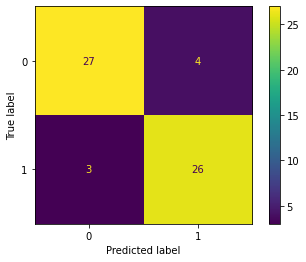

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(Y_test,X_test_prediction)
plot_confusion_matrix(log_reg, X_test, Y_test)
plt.show()